In [15]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [16]:
import numpy as np
import pandas as pd

In [17]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [18]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [19]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [20]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [21]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [22]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [23]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [24]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [25]:
columns = inspector.get_columns('measurement')
for column in columns:
    print(column['name'], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [26]:
columns = inspector.get_columns('station')
for column in columns:
    print(column['name'], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Climate Analysis

# Design a query to retrieve the last 12 months of precipitation data and plot the results

In [27]:
#last date in the measurment table
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_date

('2017-08-23')

In [28]:
# Calculate the date 1 year ago from the last data point in the database
date_1_year = dt.date(2017,8,23) - dt.timedelta(days=365)
date_1_year

datetime.date(2016, 8, 23)

In [29]:
# Perform a query to retrieve the data and precipitation scores
percip_1_year = session.query(Measurement.date, Measurement.prcp).\
            filter(Measurement.date >= '2016-08-23', Measurement.date <= '2017-08-23').\
            order_by(Measurement.date).all()
percip_1_year

 0.01),
 ('2016-09-10', 0.14),
 ('2016-09-10', 0.09),
 ('2016-09-10', 1.16),
 ('2016-09-11', 0.05),
 ('2016-09-11', 0.18),
 ('2016-09-11', 0.12),
 ('2016-09-11', 0.3),
 ('2016-09-11', 0.6),
 ('2016-09-12', 0.0),
 ('2016-09-12', 0.04),
 ('2016-09-12', None),
 ('2016-09-12', None),
 ('2016-09-12', 0.15),
 ('2016-09-12', 0.31),
 ('2016-09-12', 1.04),
 ('2016-09-13', 0.02),
 ('2016-09-13', 0.37),
 ('2016-09-13', 0.32),
 ('2016-09-13', None),
 ('2016-09-13', 0.46),
 ('2016-09-13', 0.34),
 ('2016-09-13', 1.2),
 ('2016-09-14', 1.32),
 ('2016-09-14', 0.9),
 ('2016-09-14', 1.84),
 ('2016-09-14', None),
 ('2016-09-14', 1.19),
 ('2016-09-14', 2.33),
 ('2016-09-14', 6.7),
 ('2016-09-15', 0.42),
 ('2016-09-15', 0.12),
 ('2016-09-15', 0.07),
 ('2016-09-15', None),
 ('2016-09-15', 0.17),
 ('2016-09-15', 0.83),
 ('2016-09-15', 3.35),
 ('2016-09-16', 0.06),
 ('2016-09-16', 0.01),
 ('2016-09-16', 0.07),
 ('2016-09-16', 0.0),
 ('2016-09-16', 0.01),
 ('2016-09-16', 0.06),
 ('2016-09-16', 0.61),
 ('2016-09

In [30]:
# Save the query results as a Pandas DataFrame 
percip_1_year_df = pd.DataFrame(data=percip_1_year)
#percip_1_year_df.head()

#and set the index to the date column
percip_1_year_df = percip_1_year_df.set_index("date")
percip_1_year_df.head()

,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02


In [31]:
# Sort the dataframe by date
percip_1_year_df = percip_1_year_df.sort_values(by='date')
percip_1_year_df.head()

,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02


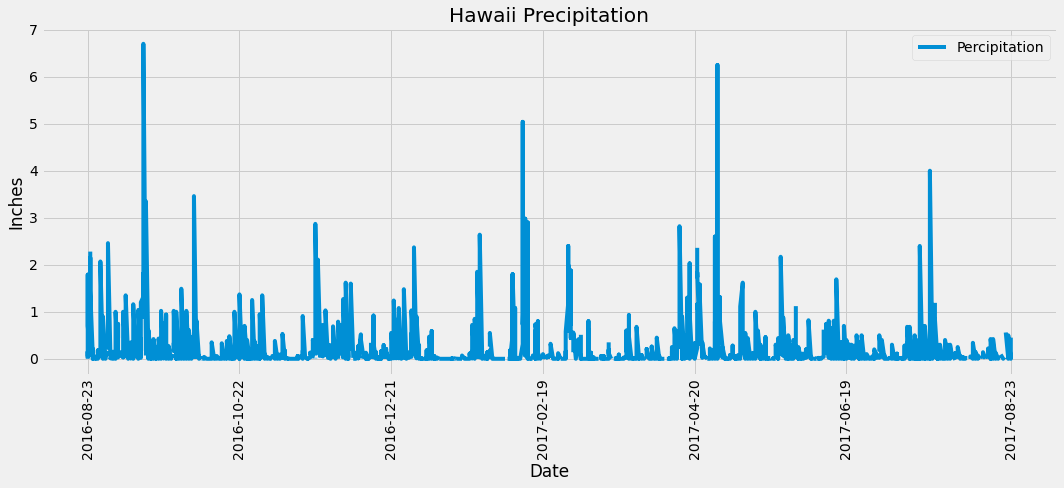

In [74]:
# Use Pandas Plotting with Matplotlib to plot the data
df = pd.DataFrame(percip_1_year)
plt.figure(figsize = (15,7))
plt.plot(df['date'], df['prcp'])
plt.title("Hawaii Precipitation")
plt.xlabel('Date')
plt.ylabel('Inches')
plt.legend(['Percipitation'])
plt.xticks(rotation='90', ticks =(0,60,120,180,240,300,365))
plt.tight_layout()
plt.show()

In [47]:
# Use Pandas to calcualte the summary statistics for the precipitation data
percip_1_year_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [48]:
# Design a query to show how many stations are available in this dataset?
stations_no = session.query(Measurement.station).distinct().count()
stations_no

9

In [49]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
session.query(Measurement.station,func.count(Measurement.station)).\
        group_by(Measurement.station).\
        order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [50]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
sel = [func.min(Measurement.tobs),
       func.max(Measurement.tobs),
       func.avg(Measurement.tobs)]
session.query(*sel).filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

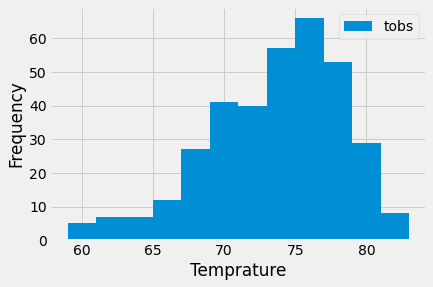

In [51]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
histogram = session.query(Measurement.tobs).filter(Measurement.station=='USC00519281').\
            filter(Measurement.date >= date_1_year).order_by(Measurement.date.desc()).all()
x = [x[0] for x in histogram]
plt.hist(x, bins=12)
plt.xlabel('Temprature')
plt.ylabel('Frequency')
plt.legend(['tobs'])
plt.show()

## Bonus Challenge Assignment

In [52]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [53]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [54]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [55]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [56]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [57]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [58]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [59]:
# Plot the daily normals as an area plot with `stacked=False`
